In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
def loadDataSet(fileName):
    data = np.loadtxt(fileName,delimiter='\t')
    return data

# 欧氏距离计算
def distEclud(x,y):
    return np.sqrt(np.sum((x-y)**2))  # 计算欧氏距离

# 为给定数据集构建一个包含K个随机质心的集合
def randCent(dataSet,k):
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) #
        centroids[i,:] = dataSet[index,:]
    return centroids

# k均值聚类
def KMeans(dataSet,k):

    m = np.shape(dataSet)[0]  #行的数目
    # 第一列存样本属于哪一簇
    # 第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    clusterChange = True
    
    # 第1步 初始化centroids
    centroids = randCent(dataSet,k)
    
    
    
    while clusterChange:
        loss_l=[0 for i in range(11)]
        clusterChange = False
        

        # 遍历所有的样本（行数）
        for i in range(m):
            minDist = 100000.0
            minIndex = -1

            # 遍历所有的质心
            #第2步 找出最近的质心
            for j in range(k):
                # 计算该样本到质心的欧式距离
                distance = distEclud(centroids[j,:],dataSet[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            # 第 3 步：更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2
                

            loss_l[int(clusterAssment[i,0])]+=int(clusterAssment[i,1])
            
        #第 4 步：更新质心
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0]]  # 获取簇类所有的点
            centroids[j,:] = np.mean(pointsInCluster,axis=0)   # 对矩阵的行求均值
        
        print(loss_l)

    print("Congratulations,cluster complete!")
    return centroids,clusterAssment

def showCluster(dataSet,k,centroids,clusterAssment):
    m,n = dataSet.shape
    if n != 2:
        print("数据不是二维的")
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr','+k']
    if k > len(mark):
        print("k值太大了")
        return 1

    # 绘制所有的样本
    for i in range(m):
        markIndex = int(clusterAssment[i,0])
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb','+k']
    # 绘制质心
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i])

    plt.show()

[0, 3, 39, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 39, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 39, 2, 0, 0, 0, 0, 0, 0, 0]
Congratulations,cluster complete!


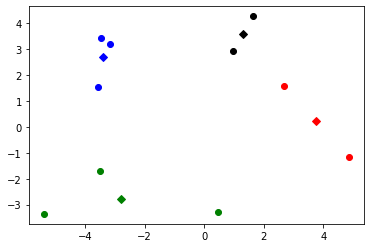

In [54]:
dataSet = loadDataSet("k-means实现test.txt")
k = 4
centroids,clusterAssment = KMeans(dataSet,k)

showCluster(dataSet,k,centroids,clusterAssment)


In [17]:
print(dataSet)

[[ 1.65  4.28]
 [-3.45  3.42]
 [ 4.84 -1.15]
 [-5.37 -3.36]
 [ 0.97  2.92]
 [-3.57  1.53]
 [ 0.45 -3.3 ]
 [-3.49 -1.72]
 [ 2.67  1.59]
 [-3.16  3.19]]


In [18]:
print(centroids)#质心

[[-4.43       -2.54      ]
 [-3.39333333  2.71333333]
 [ 1.76333333  2.93      ]
 [ 2.645      -2.225     ]]


In [19]:
print(clusterAssment)

[[ 2.     26.7496]
 [ 1.      3.5865]
 [ 3.     23.8946]
 [ 0.      0.    ]
 [ 2.     19.7864]
 [ 1.      0.    ]
 [ 3.      0.    ]
 [ 0.      0.    ]
 [ 2.      5.8897]
 [ 1.      2.9237]]


In [6]:
# dataSet = loadDataSet("test.txt")
import ast
def read_list2(text_path):
    lsit=[]
    with open('%s' % text_path, 'r', encoding="utf8") as f:  # 打开一个文件只读模式
        line = f.readlines()  # 读取文件中的每一行，放入line列表中
        for line_list in line:
            line = ast.literal_eval(line_list.replace('\n', ''))
            lsit.append(line)
    return lsit

modeled_datasets=read_list2('modeled_datasets.txt')


AttributeError: 'numpy.ndarray' object has no attribute 'array'

In [10]:
print(len(modeled_datasets),len(modeled_datasets[0]))

20808 768


In [55]:
dataSet=np.array(modeled_datasets)

In [56]:

k = 11
centroids,clusterAssment = KMeans(dataSet,k)

[0, 5810, 13324, 31910, 82191, 101225, 18059, 6409, 29782, 8676, 23276]
[8587, 10578, 13722, 36223, 47319, 80446, 12973, 11992, 35062, 6154, 22535]
[12762, 13453, 15359, 37025, 36834, 68917, 12913, 13088, 36032, 8217, 21146]
[14901, 14352, 16039, 36143, 32989, 61003, 14616, 12725, 36665, 10206, 20197]
[16480, 14852, 16225, 34807, 31448, 55720, 15963, 13148, 36273, 11580, 19620]
[17382, 14880, 16731, 33365, 31117, 51564, 16768, 14010, 35862, 12375, 19179]
[18076, 15280, 17097, 32042, 30854, 48728, 17350, 14766, 35143, 12984, 18955]
[18041, 15521, 17316, 31097, 31056, 46814, 17944, 15422, 34495, 13511, 18847]
[18209, 15853, 17368, 30100, 31128, 45330, 18197, 15977, 33953, 13999, 18772]
[18249, 16123, 17588, 29348, 31195, 43942, 18367, 16454, 33581, 14396, 18679]
[18200, 16340, 17829, 28620, 31158, 42799, 18573, 16771, 33310, 14752, 18618]
[18138, 16545, 17928, 27958, 31347, 42035, 18758, 16970, 33062, 15005, 18556]
[18192, 16659, 18144, 27290, 31412, 41374, 18849, 17173, 32889, 15185, 18

In [57]:
def store_list(lsit, text_path):
    ff = open(text_path, encoding='utf-8', mode='w')
    for line_list in lsit:
        ff.write(str(line_list))  # 写入一个新文件中
        ff.write("\n")
        
store_list(centroids, 'centroids.txt')
store_list(clusterAssment, 'clusterAssment.txt')

In [59]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
print(X_embedded)


/data/fuwen/anaconda3/envs/bj1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/data/fuwen/anaconda3/envs/bj1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 192.70021  -189.7594  ]
 [  85.536674 -305.10944 ]
 [ -29.812012 -197.94446 ]
 [  77.351494  -82.59443 ]]


In [60]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(dataSet)
print(len(X_embedded),len(X_embedded[0]))


/data/fuwen/anaconda3/envs/bj1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/data/fuwen/anaconda3/envs/bj1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


20808 2


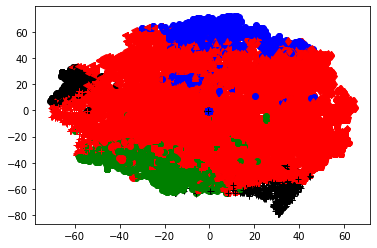

In [63]:
k=11
showCluster(X_embedded,k,centroids,clusterAssment)